In [33]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

# removing warnings
warnings.filterwarnings('ignore')
loan_data = pd.read_csv('loan.csv')

# Display dataset
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [35]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [37]:
loan_data.shape
#Data set rows and columns

(39717, 111)

# Data Cleaning


In [39]:
#  Dropping columns with over 75% missing values
threshold = len(loan_data) * 0.75
loan_data_cleaned = loan_data.dropna(thresh=threshold, axis=1)

In [41]:
missing_values = loan_data_cleaned.isnull().sum().sort_values(ascending=False)
missing_values[missing_values > 0]

emp_title                     2459
emp_length                    1075
pub_rec_bankruptcies           697
last_pymnt_d                    71
collections_12_mths_ex_med      56
chargeoff_within_12_mths        56
revol_util                      50
tax_liens                       39
title                           11
last_credit_pull_d               2
dtype: int64

In [43]:
loan_data_cleaned.shape

(39717, 53)

In [45]:
# Filling missing values in employment length

# Replacing 'years' and 'year', remove '+', and handle '< 1' by replacing it with '0.5'
loan_data_cleaned['emp_length'] = loan_data_cleaned['emp_length'].str.replace('years', '').str.replace('year', '')
loan_data_cleaned['emp_length'] = loan_data_cleaned['emp_length'].str.replace('< 1', '0.5').str.replace('+', '')

# Converting the cleaned 'emp_length' column to float
loan_data_cleaned['emp_length'] = loan_data_cleaned['emp_length'].astype('float64')
loan_data_cleaned['emp_length'] = loan_data_cleaned['emp_length'].fillna(loan_data_cleaned['emp_length'].median())


In [47]:
missing_values = loan_data_cleaned.isnull().sum().sort_values(ascending=False)
missing_values[missing_values > 0]

emp_title                     2459
pub_rec_bankruptcies           697
last_pymnt_d                    71
chargeoff_within_12_mths        56
collections_12_mths_ex_med      56
revol_util                      50
tax_liens                       39
title                           11
last_credit_pull_d               2
dtype: int64

In [49]:
#Filling remaining Values
loan_data_cleaned['emp_title'] = loan_data_cleaned['emp_title'].fillna('Unknown')
loan_data_cleaned['pub_rec_bankruptcies'] = loan_data_cleaned['pub_rec_bankruptcies'].fillna(loan_data_cleaned['pub_rec_bankruptcies'].median())
loan_data_cleaned['last_pymnt_d'] = loan_data_cleaned['last_pymnt_d'].fillna('Unknown')
loan_data_cleaned['chargeoff_within_12_mths'] = loan_data_cleaned['chargeoff_within_12_mths'].fillna(0)
loan_data_cleaned['collections_12_mths_ex_med'] = loan_data_cleaned['collections_12_mths_ex_med'].fillna(0)

loan_data_cleaned['tax_liens'] = loan_data_cleaned['tax_liens'].fillna(0)

loan_data_cleaned['title'] = loan_data_cleaned['title'].fillna('Unknown')
loan_data_cleaned['last_credit_pull_d'] = loan_data_cleaned['last_credit_pull_d'].fillna('Unknown')



In [51]:
missing_values = loan_data_cleaned.isnull().sum().sort_values(ascending=False)
missing_values[missing_values > 0]

revol_util    50
dtype: int64

In [53]:
loan_data_cleaned['revol_util'] = loan_data_cleaned['revol_util'].astype(str)
loan_data_cleaned['revol_util'] = loan_data_cleaned['revol_util'].str.replace('%','')
loan_data_cleaned['revol_util'] = loan_data_cleaned['revol_util'].astype('float64')
loan_data_cleaned['revol_util'] = loan_data_cleaned['revol_util'].fillna(loan_data_cleaned['revol_util'].median())


In [55]:
missing_values = loan_data_cleaned.isnull().sum().sort_values(ascending=False)
missing_values[missing_values > 0]

Series([], dtype: int64)

In [57]:
dtype_object=loan_data_cleaned.select_dtypes(include=['object']).columns.tolist()
dtype_object

['term',
 'int_rate',
 'grade',
 'sub_grade',
 'emp_title',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'earliest_cr_line',
 'initial_list_status',
 'last_pymnt_d',
 'last_credit_pull_d',
 'application_type']

In [59]:
dtype_Num=loan_data_cleaned.select_dtypes(include=['number']).columns.tolist()
dtype_Num

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'installment',
 'emp_length',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'collections_12_mths_ex_med',
 'policy_code',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'pub_rec_bankruptcies',
 'tax_liens']

In [61]:
loan_data_cleaned['term']

0         36 months
1         60 months
2         36 months
3         36 months
4         60 months
            ...    
39712     36 months
39713     36 months
39714     36 months
39715     36 months
39716     36 months
Name: term, Length: 39717, dtype: object

In [63]:
#  Convert 'term' column to numeric (strip 'months')
loan_data_cleaned['term'] = loan_data_cleaned['term'].str.extract('(\d+)').astype(float)


In [65]:
loan_data_cleaned['term']

0        36.0
1        60.0
2        36.0
3        36.0
4        60.0
         ... 
39712    36.0
39713    36.0
39714    36.0
39715    36.0
39716    36.0
Name: term, Length: 39717, dtype: float64

In [67]:
loan_data_cleaned['int_rate']

0        10.65%
1        15.27%
2        15.96%
3        13.49%
4        12.69%
          ...  
39712     8.07%
39713    10.28%
39714     8.07%
39715     7.43%
39716    13.75%
Name: int_rate, Length: 39717, dtype: object

In [69]:
#  Convert 'int_rate' column to numeric

loan_data_cleaned['int_rate'] = loan_data_cleaned['int_rate'].astype(str)
loan_data_cleaned['int_rate'] = loan_data_cleaned['int_rate'].str.replace('%','')
loan_data_cleaned['int_rate'] = loan_data_cleaned['int_rate'].astype('float64')

In [71]:
loan_data_cleaned['int_rate']

0        10.65
1        15.27
2        15.96
3        13.49
4        12.69
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 39717, dtype: float64

In [73]:
#  relevant columns for visualization
loan_data_visual = loan_data_cleaned[['loan_amnt', 'int_rate', 'annual_inc', 'emp_length', 'grade', 'sub_grade', 'loan_status', 'dti','purpose', 'verification_status', 'home_ownership', 'zip_code']]


In [75]:
sns.set(style="whitegrid")


# Univariate Analysis

In [79]:
loan_data_visual.describe(include = 'all')

,loan_amnt,int_rate,annual_inc,emp_length,grade,sub_grade,loan_status,dti,purpose,verification_status,home_ownership,zip_code
count,39717.000000,39717.000000,3.971700e+04,39717.000000,39717,39717,39717,39717.000000,39717,39717,39717,39717
unique,NaN,NaN,NaN,NaN,7,35,3,NaN,14,3,5,823
top,NaN,NaN,NaN,NaN,B,B3,Fully Paid,NaN,debt_consolidation,Not Verified,RENT,100xx
freq,NaN,NaN,NaN,NaN,12020,2917,32950,NaN,18641,16921,18899,597
mean,11219.443815,12.021177,6.896893e+04,5.004796,NaN,NaN,NaN,13.315130,NaN,NaN,NaN,NaN
std,7456.670694,3.724825,6.379377e+04,3.439193,NaN,NaN,NaN,6.678594,NaN,NaN,NaN,NaN
min,500.000000,5.420000,4.000000e+03,0.500000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
25%,5500.000000,9.250000,4.040400e+04,2.000000,NaN,NaN,NaN,8.170000,NaN,NaN,NaN,NaN
50%,10000.000000,11.860000,5.900000e+04,4.000000,NaN,NaN,NaN,13.400000,NaN,NaN,NaN,NaN
75%,15000.000000,14.590000,8.230000e+04,9.000000,NaN,NaN,NaN,18.600000,NaN,NaN,NaN,NaN


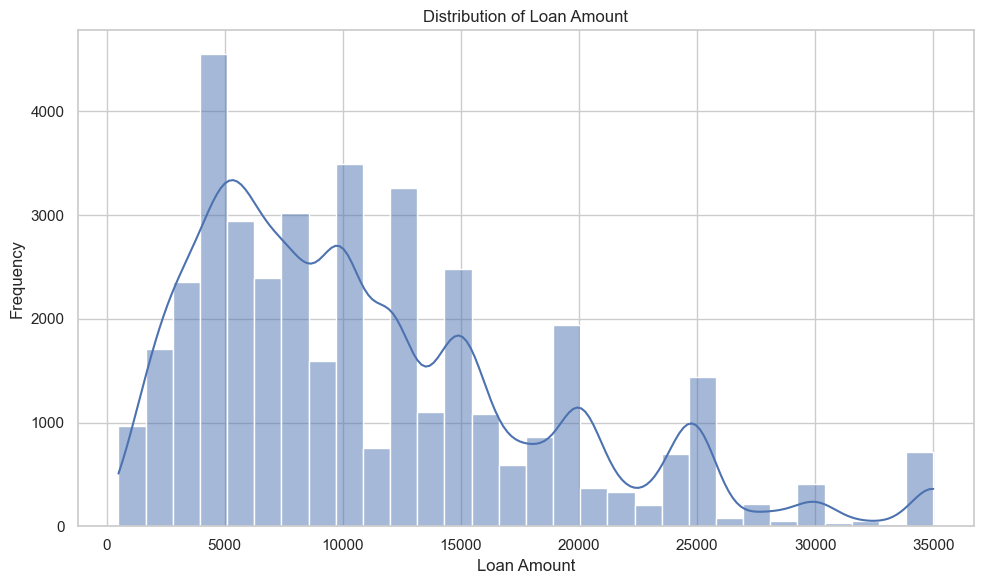

In [81]:
 #Distribution of Loan Amount
plt.figure(figsize=(10, 6))
sns.histplot(loan_data_visual['loan_amnt'], kde=True, bins=30)
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


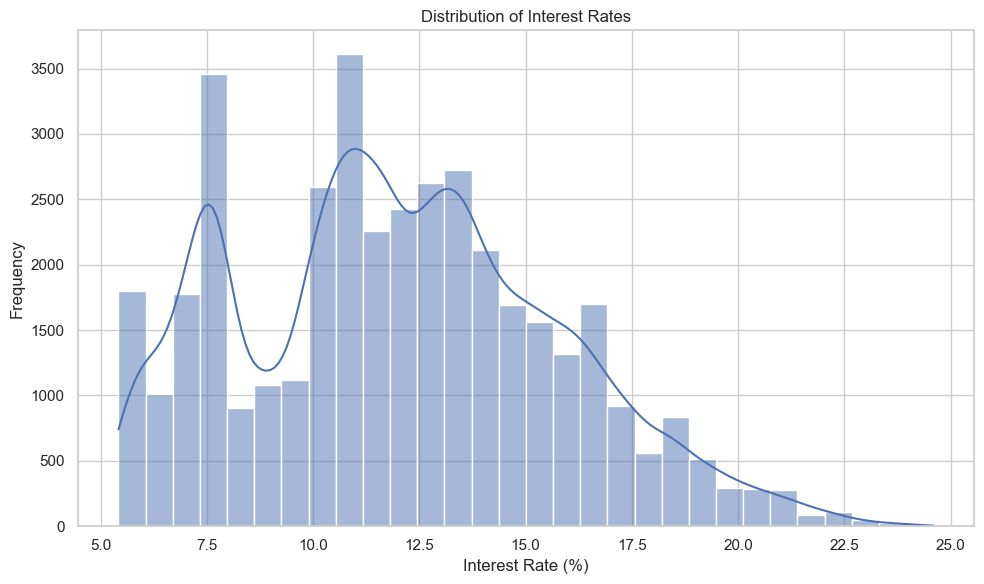

In [83]:
# Distribution of Interest Rates
plt.figure(figsize=(10, 6))
sns.histplot(loan_data_visual['int_rate'], kde=True, bins=30)
plt.title('Distribution of Interest Rates')
plt.xlabel('Interest Rate (%)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

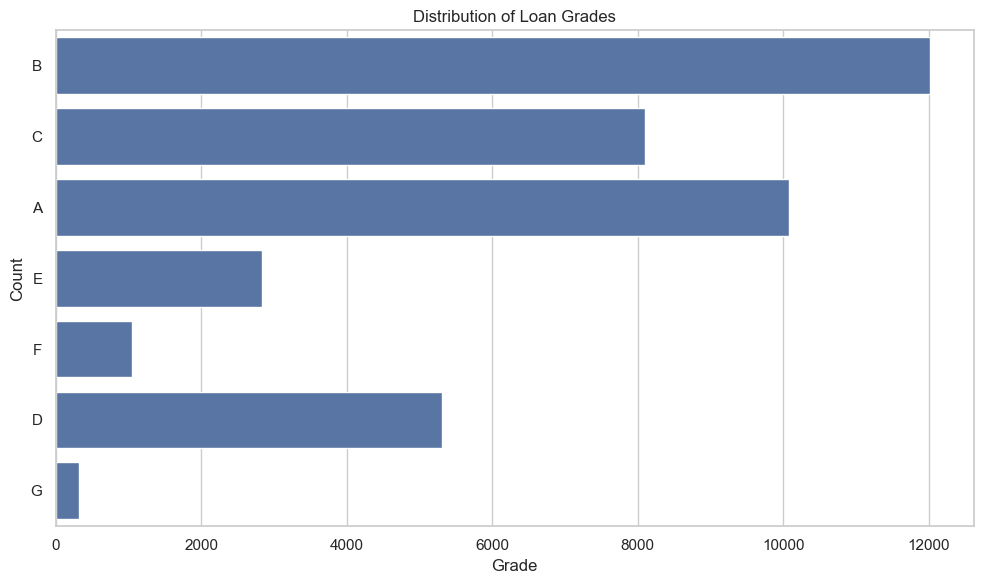

In [87]:
# Grade Distribution
plt.figure(figsize=(10, 6))
sns.countplot(loan_data_visual['grade'])
plt.title('Distribution of Loan Grades')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

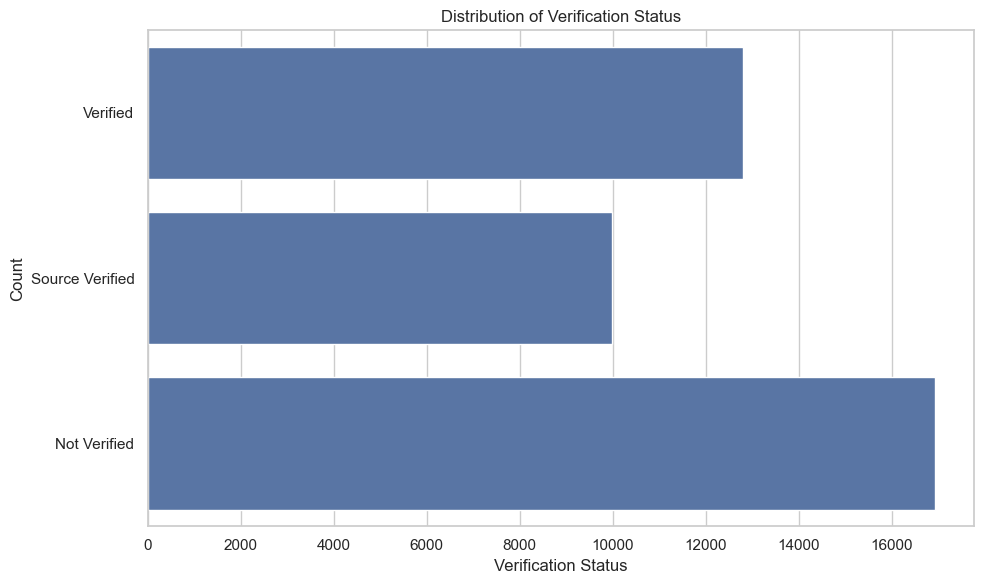

In [89]:
#  Verification Status 
plt.figure(figsize=(10, 6))
sns.countplot(loan_data_visual['verification_status'])
plt.title('Distribution of Verification Status')
plt.xlabel('Verification Status')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


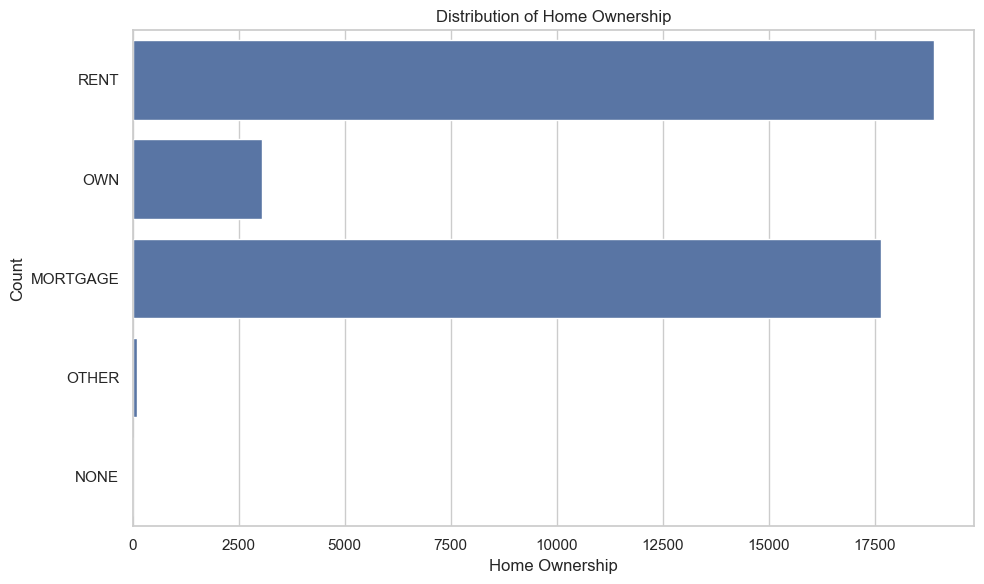

In [91]:
# Home Ownership 
plt.figure(figsize=(10, 6))
sns.countplot(loan_data_visual['home_ownership'])
plt.title('Distribution of Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [93]:
loan_data_visual['zip_code']

0        860xx
1        309xx
2        606xx
3        917xx
4        972xx
         ...  
39712    802xx
39713    274xx
39714    017xx
39715    208xx
39716    027xx
Name: zip_code, Length: 39717, dtype: object

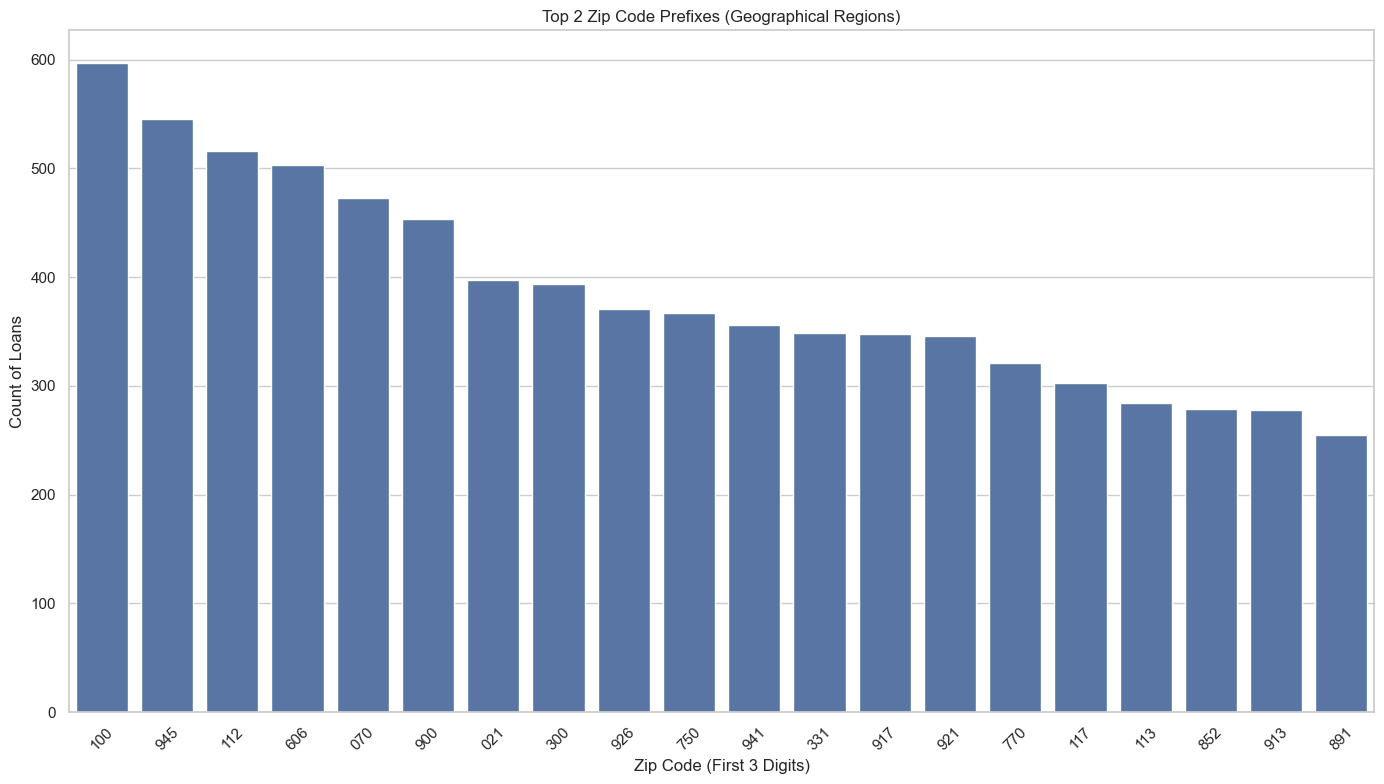

In [95]:
loan_data_visual['zip_code_prefix'] = loan_data_visual['zip_code'].str[:3]

plt.figure(figsize=(14, 8))
sns.countplot(x='zip_code_prefix', data=loan_data_visual, order=loan_data_visual['zip_code_prefix'].value_counts().index[:20])  # Limiting to top 15 zip codes
plt.title('Top 2 Zip Code Prefixes (Geographical Regions)')
plt.xlabel('Zip Code (First 3 Digits)')
plt.ylabel('Count of Loans')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Bi Variate Analysis

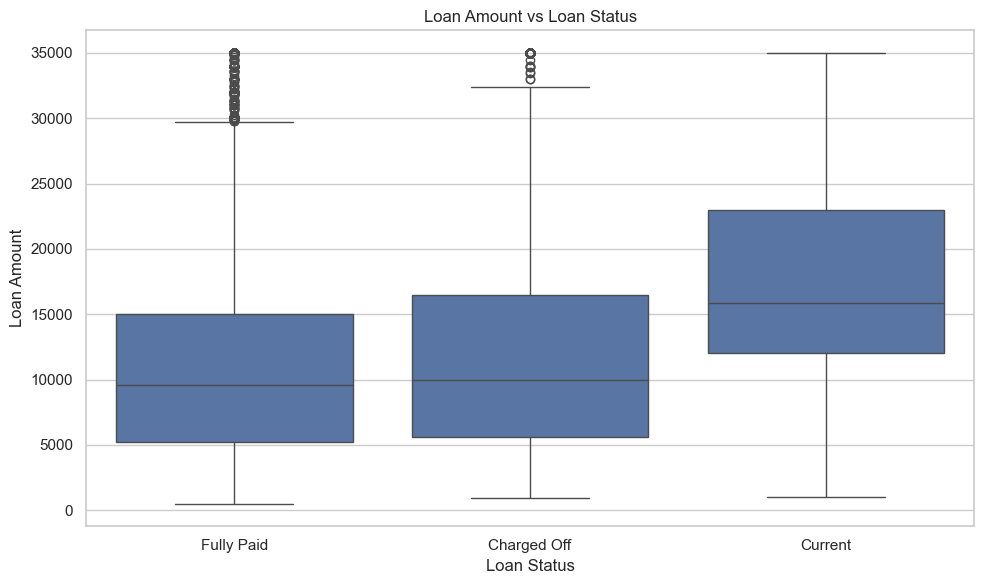

In [97]:
#  Loan Amount vs Loan Status 
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='loan_amnt', data=loan_data_visual)
plt.title('Loan Amount vs Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.tight_layout()
plt.show()


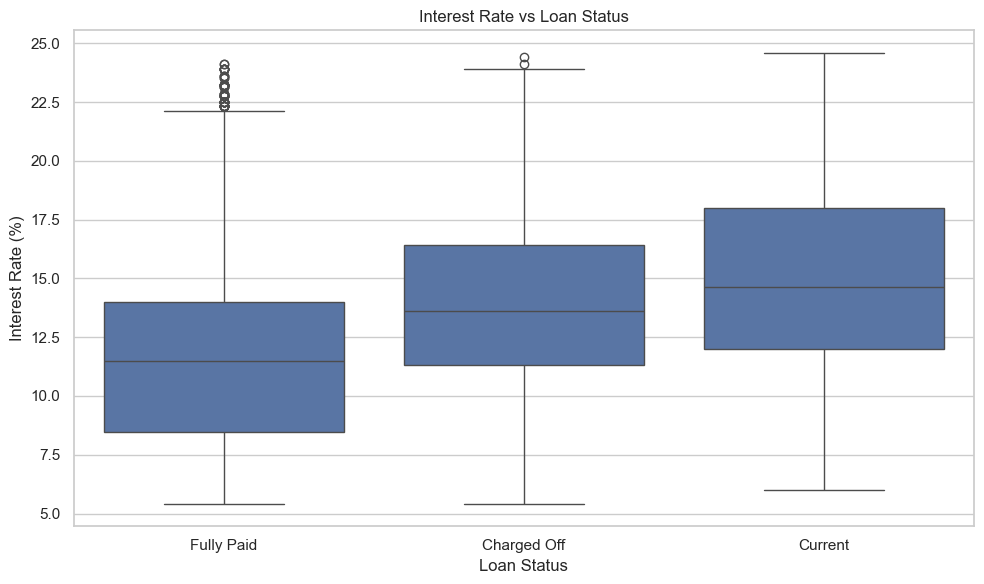

In [99]:
# Interest Rate vs Loan Status 
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='int_rate', data=loan_data_visual)
plt.title('Interest Rate vs Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Interest Rate (%)')
plt.tight_layout()
plt.show()

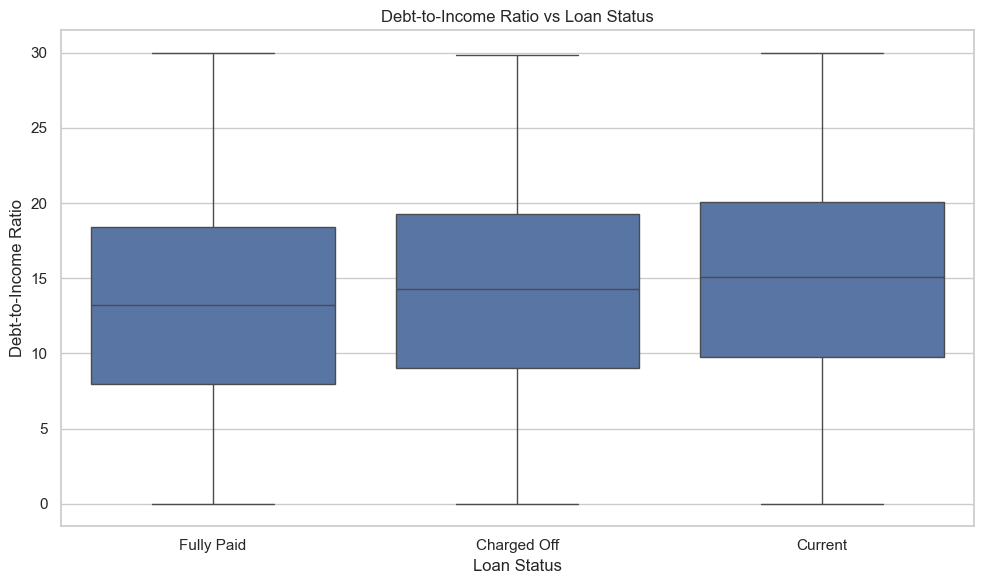

In [101]:
#  Debt-to-Income Ratio (DTI) vs Loan Status 
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='dti', data=loan_data_visual)
plt.title('Debt-to-Income Ratio vs Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Debt-to-Income Ratio')
plt.tight_layout()
plt.show()

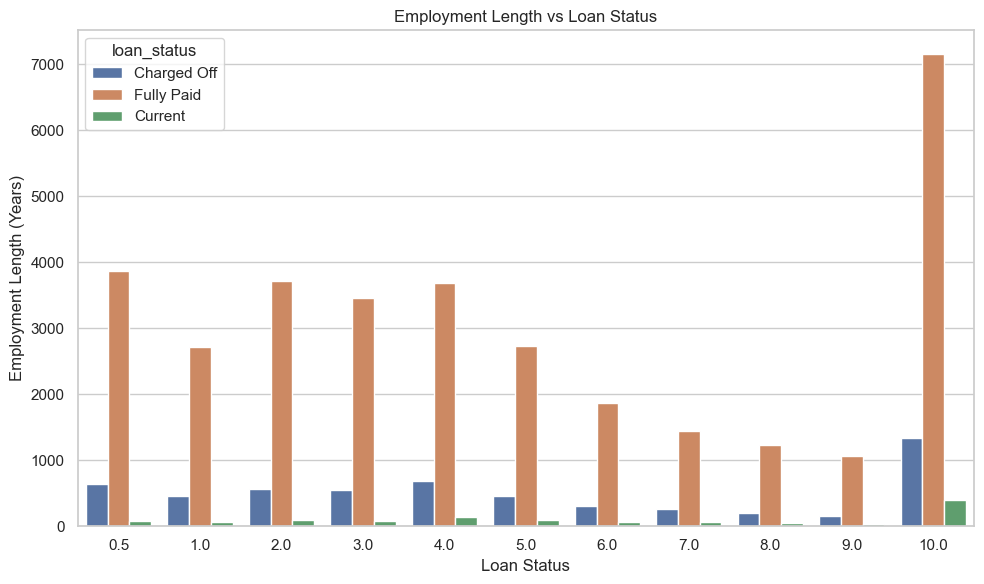

In [103]:
#  Employment Length vs Loan Status 
plt.figure(figsize=(10, 6))
sns.countplot(x='emp_length', hue='loan_status', data=loan_data_visual)
plt.title('Employment Length vs Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Employment Length (Years)')
plt.tight_layout()
plt.show()

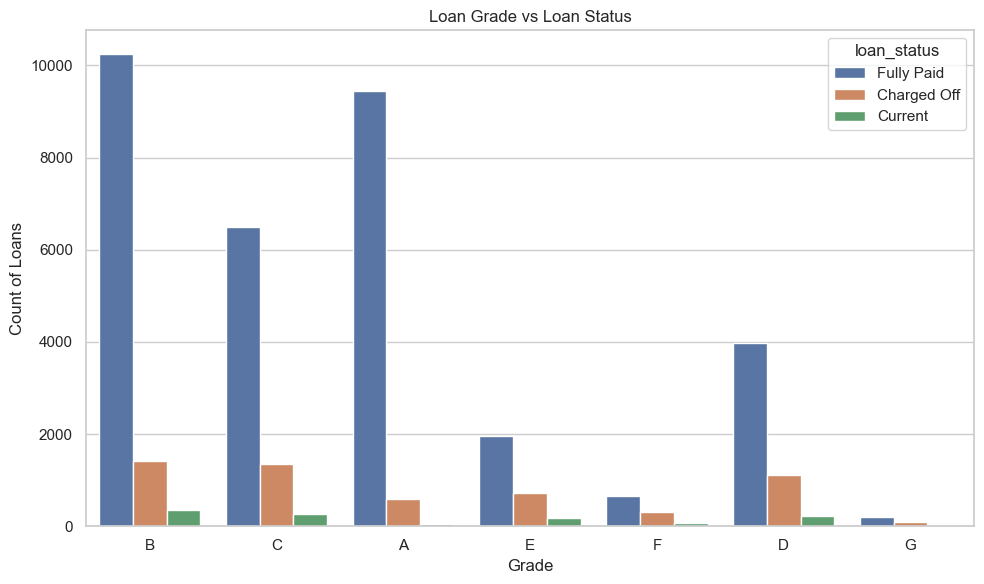

In [105]:
#  Grade vs Loan Status 
plt.figure(figsize=(10, 6))
sns.countplot(x='grade', hue='loan_status', data=loan_data_visual)
plt.title('Loan Grade vs Loan Status')
plt.xlabel('Grade')
plt.ylabel('Count of Loans')
plt.tight_layout()
plt.show()

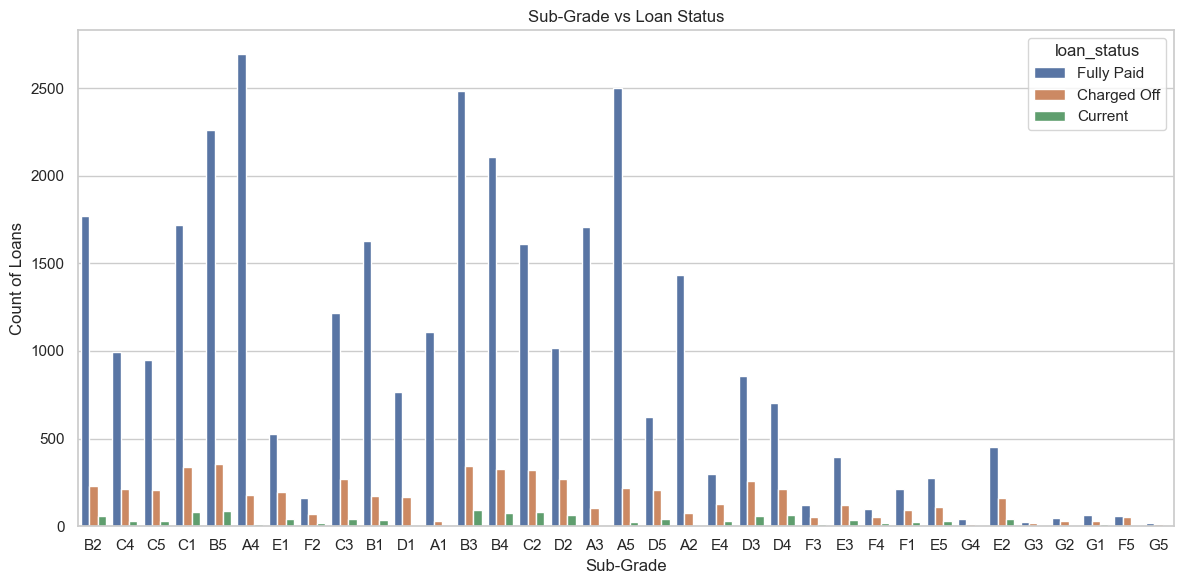

In [107]:
# Sub-Grade vs Loan Status 
plt.figure(figsize=(12, 6))
sns.countplot(x='sub_grade', hue='loan_status', data=loan_data_visual)
plt.title('Sub-Grade vs Loan Status')
plt.xlabel('Sub-Grade')
plt.ylabel('Count of Loans')
plt.tight_layout()
plt.show()

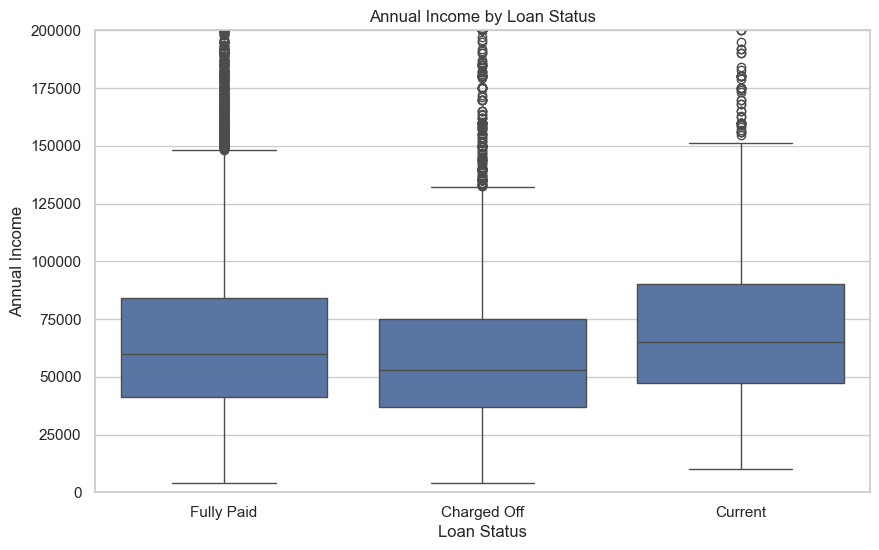

In [109]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='annual_inc', data=loan_data_visual)
plt.title('Annual Income by Loan Status')
plt.ylim(0, 200000)
plt.xlabel('Loan Status')
plt.ylabel('Annual Income')
plt.show()

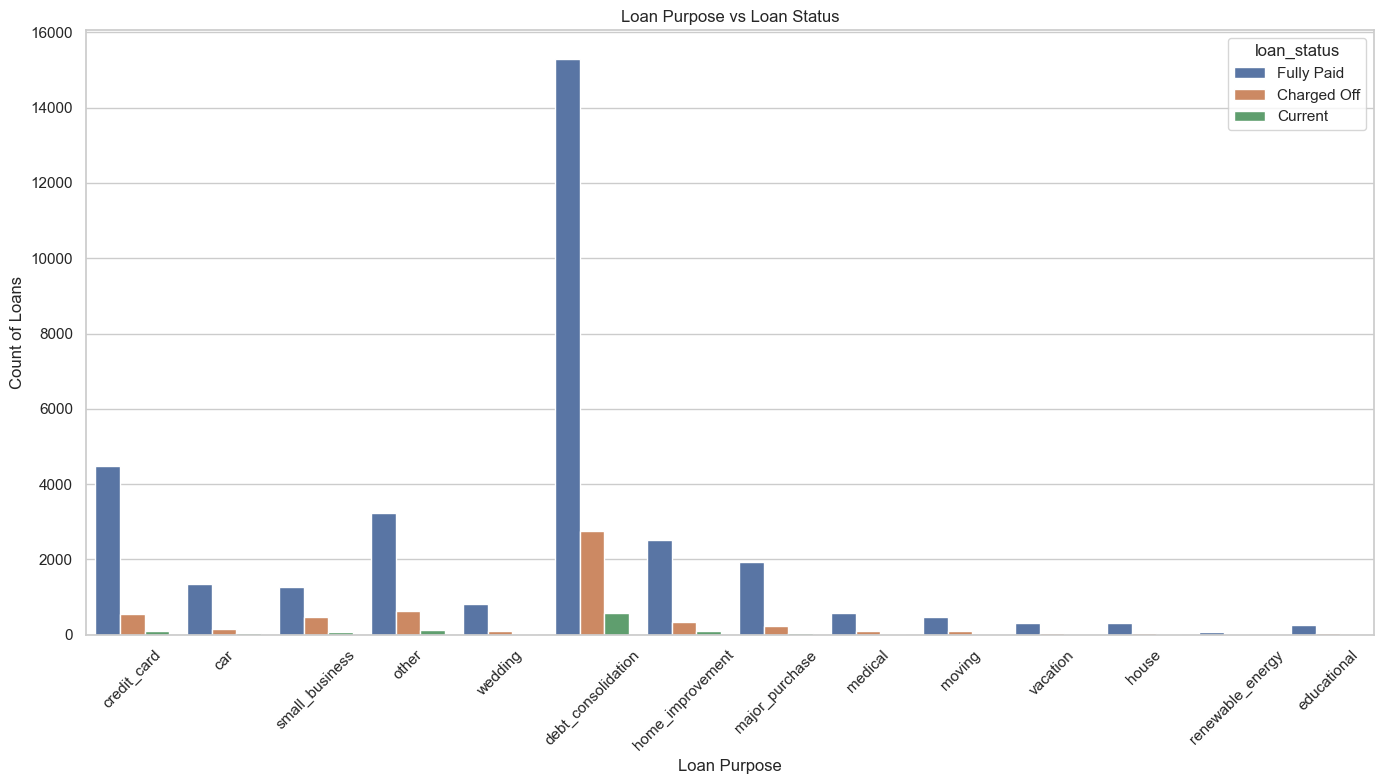

In [111]:
#  Loan Purpose Count vs Loan Status
plt.figure(figsize=(14, 8))
sns.countplot(x='purpose', hue='loan_status', data=loan_data_visual)
plt.title('Loan Purpose vs Loan Status')
plt.xlabel('Loan Purpose')
plt.ylabel('Count of Loans')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

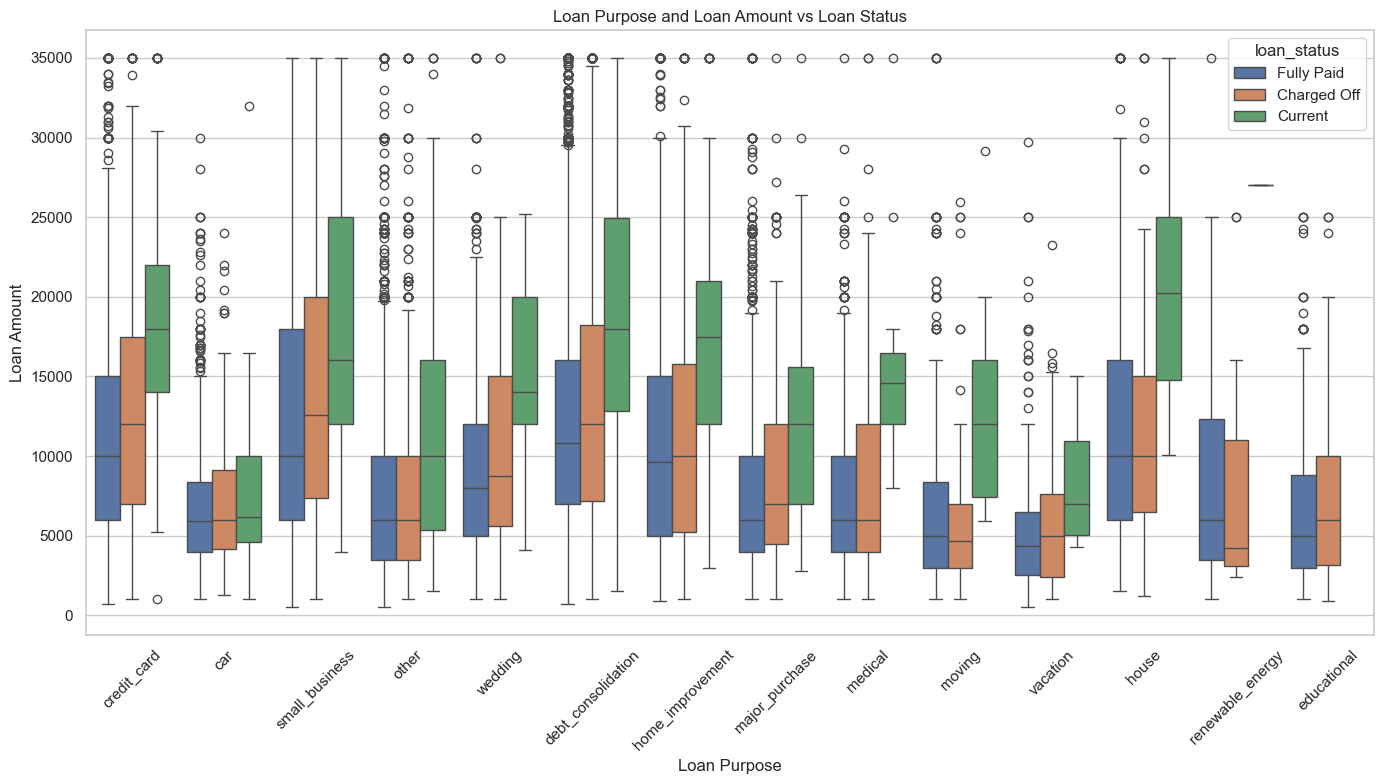

In [113]:
#  Loan Purpose Boxplot (Loan Amount) vs Loan Status
plt.figure(figsize=(14, 8))
sns.boxplot(x='purpose', y='loan_amnt', hue='loan_status', data=loan_data_visual)
plt.title('Loan Purpose and Loan Amount vs Loan Status')
plt.xlabel('Loan Purpose')
plt.ylabel('Loan Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

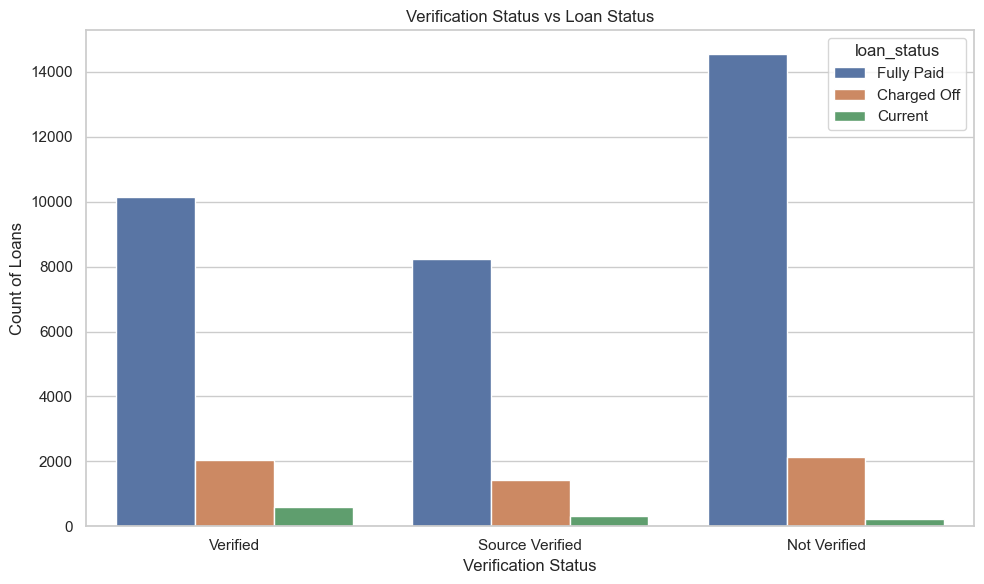

In [115]:
#  Verification Status vs Loan Status
plt.figure(figsize=(10, 6))
sns.countplot(x='verification_status', hue='loan_status', data=loan_data_visual)
plt.title('Verification Status vs Loan Status')
plt.xlabel('Verification Status')
plt.ylabel('Count of Loans')
plt.tight_layout()
plt.show()

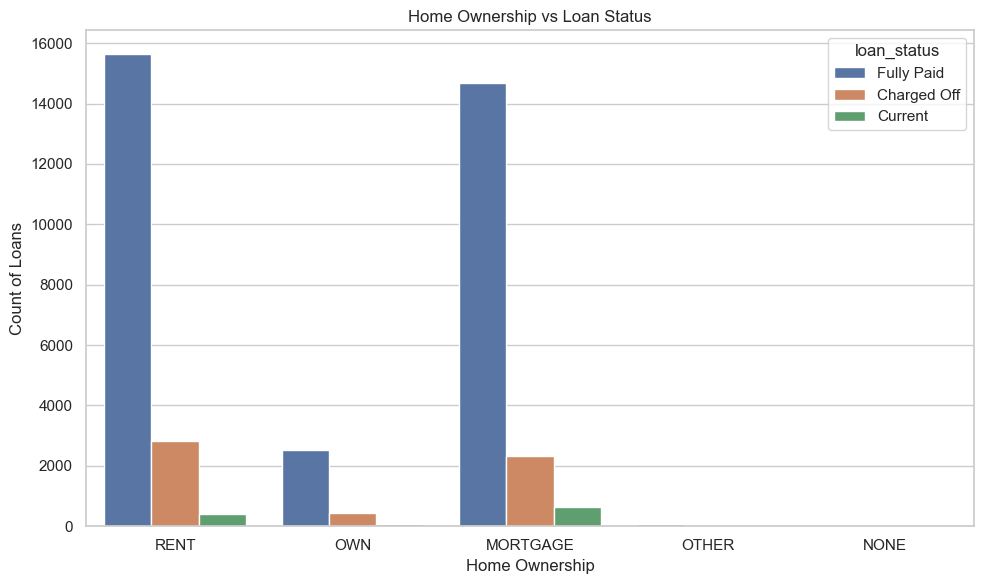

In [117]:
#  Home Ownership vs Loan Status
plt.figure(figsize=(10, 6))
sns.countplot(x='home_ownership', hue='loan_status', data=loan_data_visual)
plt.title('Home Ownership vs Loan Status')
plt.xlabel('Home Ownership')
plt.ylabel('Count of Loans')
plt.tight_layout()
plt.show()

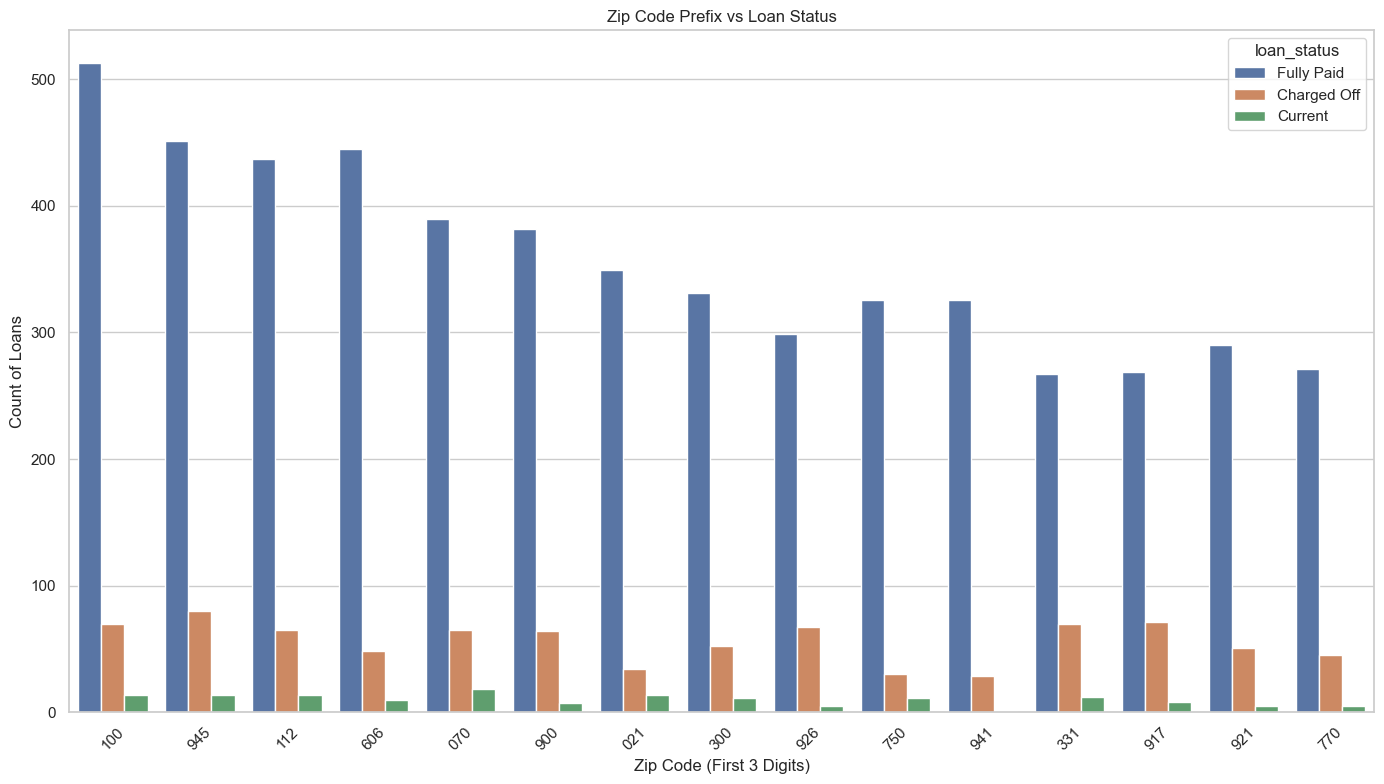

In [119]:
# Zip Code Prefix vs Loan Status
plt.figure(figsize=(14, 8))
sns.countplot(x='zip_code_prefix', hue='loan_status', data=loan_data_visual, order=loan_data_visual['zip_code_prefix'].value_counts().index[:15])  # Top 15 zip codes
plt.title('Zip Code Prefix vs Loan Status')
plt.xlabel('Zip Code (First 3 Digits)')
plt.ylabel('Count of Loans')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Multivariate Analysis

In [121]:
dtype_Num=loan_data_cleaned.select_dtypes(include=['number'],)
pd.set_option('display.max_columns', None)
dtype_Num

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36.0,10.65,162.87,10.0,24000.0,27.65,0,1,3,0,13648,83.7,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,171.62,0.0,1,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60.0,15.27,59.83,0.5,30000.0,1.00,0,5,3,0,1687,9.4,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0.0,1,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36.0,15.96,84.33,10.0,12252.0,8.72,0,2,2,0,2956,98.5,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,649.91,0.0,1,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36.0,13.49,339.31,10.0,49200.0,20.00,0,1,10,0,5598,21.0,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,357.48,0.0,1,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60.0,12.69,67.79,1.0,80000.0,17.94,0,0,15,0,27783,53.9,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,67.79,0.0,1,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36.0,8.07,78.42,4.0,110000.0,11.33,0,0,13,0,7274,13.1,40,0.00,0.00,2822.969293,1213.88,2500.00,322.97,0.00,0.00,0.00,80.90,0.0,1,0,0.0,0,0.0,0.0
39713,90665,90607,8500,8500,875.0,36.0,10.28,275.38,3.0,18000.0,6.40,1,1,6,0,8847,26.9,9,0.00,0.00,9913.491822,1020.51,8500.00,1413.49,0.00,0.00,0.00,281.94,0.0,1,0,0.0,0,0.0,0.0
39714,90395,90390,5000,5000,1325.0,36.0,8.07,156.84,0.5,100000.0,2.30,0,0,11,0,9698,19.4,20,0.00,0.00,5272.161128,1397.12,5000.00,272.16,0.00,0.00,0.00,0.00,0.0,1,0,0.0,0,0.0,0.0
39715,90376,89243,5000,5000,650.0,36.0,7.43,155.38,0.5,200000.0,3.72,0,0,17,0,85607,0.7,26,0.00,0.00,5174.198551,672.66,5000.00,174.20,0.00,0.00,0.00,0.00,0.0,1,0,0.0,0,0.0,0.0


In [123]:
dtype_object=loan_data_cleaned.select_dtypes(include=['object'])
dtype_object

,grade,sub_grade,emp_title,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,last_credit_pull_d,application_type
0,B,B2,Unknown,RENT,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,Jan-85,f,Jan-15,May-16,INDIVIDUAL
1,C,C4,Ryder,RENT,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,Apr-99,f,Apr-13,Sep-13,INDIVIDUAL
2,C,C5,Unknown,RENT,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,606xx,IL,Nov-01,f,Jun-14,May-16,INDIVIDUAL
3,C,C1,AIR RESOURCES BOARD,RENT,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,Feb-96,f,Jan-15,Apr-16,INDIVIDUAL
4,B,B5,University Medical Group,RENT,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972xx,OR,Jan-96,f,May-16,May-16,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,A,A4,FiSite Research,MORTGAGE,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,home_improvement,Home Improvement,802xx,CO,Nov-90,f,Jul-10,Jun-10,INDIVIDUAL
39713,C,C1,"Squarewave Solutions, Ltd.",RENT,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Retiring credit card debt,274xx,NC,Dec-86,f,Jul-10,Jul-10,INDIVIDUAL
39714,A,A4,Unknown,MORTGAGE,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,MBA Loan Consolidation,017xx,MA,Oct-98,f,Apr-08,Jun-07,INDIVIDUAL
39715,A,A2,Unknown,MORTGAGE,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,JAL Loan,208xx,MD,Nov-88,f,Jan-08,Jun-07,INDIVIDUAL


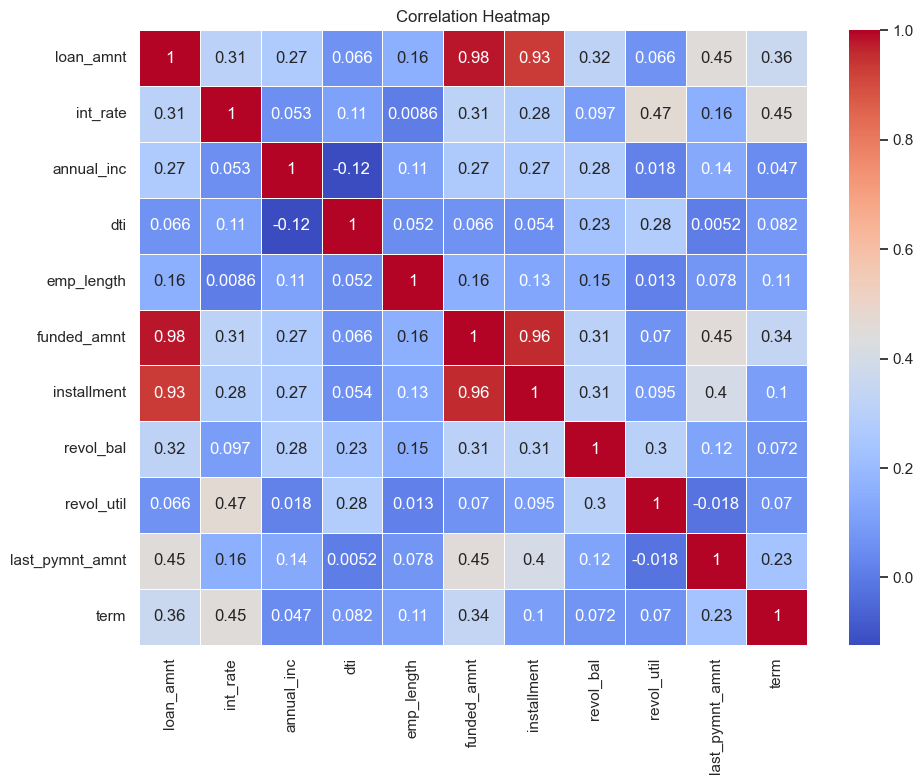

In [125]:
plt.figure(figsize=(10, 8))
corr_matrix = loan_data_cleaned[['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'emp_length', 'funded_amnt','installment','revol_bal','revol_util','last_pymnt_amnt','term']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()